In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import reports
import utilities
import clean
import normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = utilities.create_spelling_dictionary(wordlist_dir, wordlists)

In [7]:
title = "Sligo"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/Sligo/baseline

Average verified rate: 0.9446963320935031

Average of error rates: 0.10142254901960783

Total token count: 294664



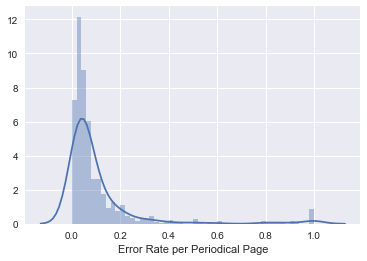

In [10]:
stats = reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = reports.get_errors_summary( stats )
reports.top_errors( errors_summary, 20 )

[("'", 695),
 ('d', 692),
 ('m', 674),
 ('w', 660),
 ('-', 472),
 ('e', 367),
 ('n', 285),
 ('f', 239),
 ('r', 228),
 ('g', 227),
 ("-'", 226),
 ('ñ', 195),
 ('th', 177),
 ('¥', 165),
 ('t', 103),
 ('co', 99),
 ('con-', 85),
 (')', 84),
 ('tion', 83),
 ('re-', 65),
 ('ment', 59),
 ('in-', 55),
 ('(', 48),
 ('k', 44),
 ('col-', 42),
 ('be-', 41),
 ('=', 40),
 ('lege', 37),
 ('stu-', 37),
 ('sligon', 36),
 ('de-', 35),
 ('com-', 34),
 ('_', 34),
 ('ex-', 33),
 ('(continued', 32),
 ('ence', 31),
 ('schwab', 30),
 ('mis-', 29),
 ('u', 27),
 ('ñthe', 27),
 ('dis-', 26),
 ('numbers)', 24),
 ('pro-', 24),
 ('pa', 24),
 ('un-', 23),
 ('ber', 23),
 ('im-', 23),
 ('pre-', 22),
 ('mattingly', 22),
 ('editor-in-chief', 21),
 ('mt', 21)]

## Review Special Character Use

In [12]:
reports.tokens_with_special_characters(errors_summary)

[('ñ', 195),
 ('¥', 165),
 (')', 84),
 ('(', 48),
 ('=', 40),
 ('_', 34),
 ('(continued', 32),
 ('ñthe', 27),
 ('numbers)', 24),
 ('\\', 16),
 ('/', 14),
 ('ã', 12),
 ('(plain)', 12),
 ('%', 10),
 ('ñin', 10),
 ('ñelder', 9),
 ('ñand', 9),
 ('[', 9),
 ('£', 8),
 ('*', 8),
 ('ña', 8),
 ('(opposite', 7),
 ('¥-', 7),
 ('willard)', 7),
 ('ô', 6),
 ('¥¥', 6),
 ('ñone', 6),
 ('(formerly', 6),
 ('ñwhen', 6),
 ('+', 6),
 ('preferñwhether', 5),
 ('¥¥¥', 5),
 ('ñpresident', 5),
 ('`', 5),
 ('ñit', 5),
 ('(no', 5),
 ('ñnot', 4),
 ('-¥', 4),
 ('heñ', 4),
 ('workñcleaning', 4),
 ('addressñ', 4),
 ('ñthat', 4),
 ('ñan', 4),
 ('(class', 4),
 ('paperñyou', 4),
 ('ñto', 4),
 ('(midnight)', 4),
 ('ñwhat', 4),
 (']', 4),
 ('(poem)', 3),
 ('ec)', 3),
 ('ñdr', 3),
 ('¥t', 3),
 ('placeñ', 3),
 ('~', 3),
 ('ñwell', 3),
 ('¥¥¥¥', 3),
 ('(successors', 3),
 ('-=', 3),
 ('accessibleñ', 3),
 ('=¥', 3),
 ('net)', 3),
 ('(and', 3),
 ('ñasbury', 3),
 ('ñed', 3),
 ('(the', 3),
 ('cords)', 3),
 ("wavingñchildren's", 3

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/Sligo/correction1

Average verified rate: 0.9503606581884528

Average of error rates: 0.08799901960784313

Total token count: 294323



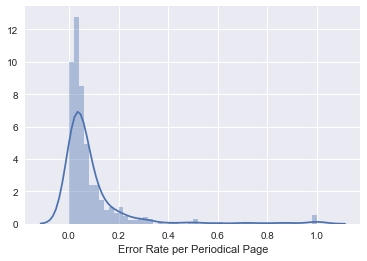

In [14]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 707),
 ('d', 697),
 ('m', 674),
 ('w', 665),
 ('-', 510),
 ('e', 379),
 ('n', 286),
 ('f', 242),
 ('r', 240),
 ('g', 228),
 ("-'", 227),
 ('th', 178),
 ('t', 109),
 ('co', 99),
 ('con-', 85),
 ('tion', 84),
 ('re-', 65),
 ('ment', 59),
 ('in-', 55),
 ('k', 44),
 ('col-', 42),
 ('be-', 41),
 ('stu-', 37),
 ('lege', 37),
 ('sligon', 36),
 ('de-', 35),
 ('ex-', 35),
 ('com-', 34),
 ('ence', 31),
 ('schwab', 30),
 ('mis-', 29),
 ('u', 27),
 ('dis-', 26),
 ('un-', 24),
 ('pa', 24),
 ('pro-', 24),
 ('ber', 23),
 ('--', 23),
 ('im-', 23),
 ('pre-', 22),
 ('mattingly', 22),
 ('mt', 22),
 ('editor-in-chief', 21),
 ('kuppenheimer', 20),
 ('mem-', 20),
 ('ful', 20),
 ('inter-', 20),
 ('en-', 20),
 ('ac-', 20),
 ('wash-', 20)]

## Correction 2 -- Correct Line Endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/Sligo/correction2

Average verified rate: 0.9661467546429712

Average of error rates: 0.07646568627450981

Total token count: 291139



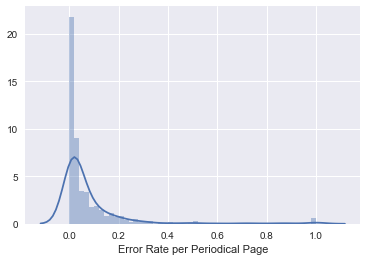

In [17]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 707),
 ('d', 697),
 ('m', 673),
 ('w', 665),
 ('-', 504),
 ('e', 379),
 ('n', 286),
 ('f', 241),
 ('r', 238),
 ('g', 228),
 ("-'", 227),
 ('th', 178),
 ('t', 109),
 ('co', 99),
 ('k', 44),
 ('sligon', 36),
 ('schwab', 30),
 ('u', 27),
 ('pa', 24),
 ('--', 23),
 ('mt', 22),
 ('mattingly', 22),
 ('editor-in-chief', 21),
 ('kuppenheimer', 20),
 ("painters'", 19),
 ('va', 19),
 ('ph', 17),
 ('-minute', 16),
 ('lippart', 14),
 ('kamoda', 14),
 ('styleplus', 14),
 ('gonian', 14),
 ('dietel', 13),
 ('rebok', 13),
 ('house-furnishings', 13),
 ('herzog', 13),
 ('flather', 12),
 ('kimonas', 12),
 ('z', 12),
 ('ahrens', 11),
 ('chesnutt', 11),
 ('ailes', 11),
 ('friedlander', 11),
 ("cardia's", 11),
 ('ei', 11)]

## Correction 3 -- Remove Extra Dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Sligo19160401-V01-01-page20.txt: [('WASH-', 'WASH'), ('bright-', 'bright')]
Sligo19160401-V01-01-page23.txt: [('-', '')]
Sligo19160401-V01-01-page27.txt: [('-minute', 'minute'), ('-minute', 'minute'), ('-minute', 'minute'), ('-minute', 'minute'), ('-minute', 'minute'), ('-minute', 'minute'), ('-minute', 'minute'), ('-minute', 'minute'), ('-', '')]
Sligo19160401-V01-01-page7.txt: [('-.', '.'), ('F--', 'F-'), ('--', '-'), ('a-', 'a')]
Sligo19160501-VXX-XX-page14.txt: [('-', '')]
Sligo19160501-VXX-XX-page16.txt: [('-J', 'J'), ('-.', '.'), ("d'T-", "d'T"), ('-', ''), ('-', '')]
Sligo19160501-VXX-XX-page17.txt: [("-'", "'")]
Sligo19160501-VXX-XX-page18.txt: [('-', ''), ('-', ''), ('-', '')]
Sligo19160501-VXX-XX-page25.txt: [('-', ''), ("-.'re", ".'re"), ('-t-.', 't-.'), ('-', ''), ('-', '')]
Sligo19160501-VXX-XX-page27.txt: [("-'", "'"), ("-'", "'"), ("-'", "'"), ('-', ''), ("-'", "'"), ("-'", "'"), ("-'", "'"), ("-'", "'"), ('-', ''), ("-'", "'"), ("-'", "'"), ("-'", "'"), ("-'", "'"), ("-

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/Sligo/correction3

Average verified rate: 0.9685648560454713

Average of error rates: 0.07120882352941177

Total token count: 290821



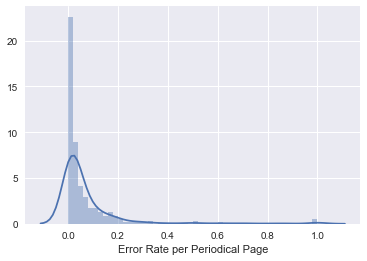

In [20]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 938),
 ('d', 700),
 ('m', 673),
 ('w', 668),
 ('e', 390),
 ('n', 291),
 ('r', 252),
 ('f', 244),
 ('g', 234),
 ('th', 178),
 ('t', 114),
 ('co', 105),
 ('k', 45),
 ('sligon', 37),
 ('schwab', 30),
 ('u', 27),
 ('pa', 24),
 ('mt', 23),
 ('mattingly', 22),
 ('kuppenheimer', 20),
 ("painters'", 19),
 ('editor-in-chief', 19),
 ('va', 19),
 ('ph', 17),
 ('x', 15),
 ('gonian', 14),
 ('lippart', 14),
 ('kamoda', 14),
 ('styleplus', 14),
 ('dietel', 13),
 ('z', 13),
 ('rebok', 13),
 ('herzog', 13),
 ('flather', 12),
 ('kimonas', 12),
 ('ahrens', 11),
 ('friedlander', 11),
 ('ailes', 11),
 ('ei', 11),
 ("cardia's", 11),
 ('chesnutt', 11)]

## Correction 4 -- Remove extra quotation marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
        print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Sligo19160401-V01-01-page6.txt: [("'tween", 'tween'), ("'round", 'round')]
Sligo19160501-VXX-XX-page14.txt: [("'.", '.')]
Sligo19160501-VXX-XX-page24.txt: [("'.", '.')]
Sligo19160501-VXX-XX-page34.txt: [("'k", 'k'), ('\'oki.".', 'oki.".'), ("'..", '..')]
Sligo19160501-VXX-XX-page66.txt: [("'tfti", 'tfti')]
Sligo19160501-VXX-XX-page78.txt: [("'tween", 'tween'), ("'Till", 'Till')]
Sligo19161101-V01-05-page28.txt: [("'Fteg.", 'Fteg.')]
Sligo19161101-V01-05-page3.txt: [("'.", '.')]
Sligo19161201-V01-06-page11.txt: [("'round", 'round')]
Sligo19170101-V01-07-page19.txt: [("'ere", 'ere')]
Sligo19170101-V01-07-page24.txt: [("'The", 'The'), ("'Reg", 'Reg')]
Sligo19170201-V01-08-page11.txt: [("'Alice", 'Alice')]
Sligo19170201-V01-08-page12.txt: [("'em", 'em')]
Sligo19170201-V01-08-page15.txt: [("'cause", 'cause')]
Sligo19170201-V01-08-page24.txt: [("'Bout", 'Bout')]
Sligo19170201-V01-08-page25.txt: [("'em", 'em')]
Sligo19170301-V01-09-page12.txt: [("'Tis", 'Tis')]
Sligo19170301-V01-09-page15.txt

## Correction 5 -- Rejoin Split Words

In [23]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction5"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Sligo19160401-V01-01-page17.txt: [('Mc', 'Manus')]
Sligo19160501-VXX-XX-page32.txt: [('SLIGON', 'IAN')]
Sligo19160501-VXX-XX-page41.txt: [('Winnif', 'red')]
Sligo19160501-VXX-XX-page66.txt: [('ri', 'A')]
Sligo19160501-VXX-XX-page78.txt: [('Na', 'ture'), ("E'", 'er'), ('Il', 'a')]
Sligo19160501-VXX-XX-page8.txt: [('ti', 'm')]
Sligo19160901-V01-03,04-page32.txt: [('CHIL', 'DREN')]
Sligo19160901-V01-03,04-page7.txt: [('HM', 'M')]
Sligo19160901-V01-03,04-page9.txt: [('SLIGON', 'IAN')]
Sligo19161101-V01-05-page30.txt: [('CHIL', 'DREN')]
Sligo19170101-V01-07-page18.txt: [('gli', 'M')]
Sligo19170201-V01-08-page12.txt: [('SLIGON', 'IAN')]
Sligo19170201-V01-08-page13.txt: [('SLIGON', 'IAN')]
Sligo19170201-V01-08-page19.txt: [('SLIGON', 'IAN')]
Sligo19170201-V01-08-page21.txt: [('SLIGON', 'IAN')]
Sligo19170301-V01-09-page7.txt: [('SLI', 'GONIAN'), ('SLIGON', 'IAN')]
Sligo19170501-V02-02-page14.txt: [('co', 'operated')]
Sligo19170501-V02-02-page31.txt: [('Pa', 'ge')]
Sligo19170901-V02-03,04-page1

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/Sligo/correction5

Average verified rate: 0.9693109936262353

Average of error rates: 0.06974901960784315

Total token count: 290723



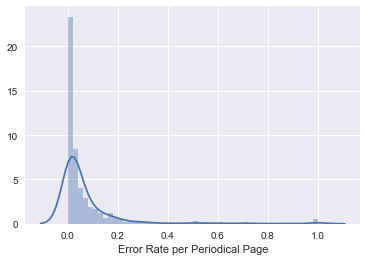

In [24]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [25]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 918),
 ('d', 700),
 ('m', 670),
 ('w', 668),
 ('e', 390),
 ('n', 291),
 ('r', 254),
 ('f', 244),
 ('g', 234),
 ('th', 177),
 ('t', 116),
 ('co', 99),
 ('k', 46),
 ('schwab', 30),
 ('u', 27),
 ('mt', 23),
 ('mattingly', 22),
 ('pa', 22),
 ('kuppenheimer', 20),
 ('editor-in-chief', 19),
 ("painters'", 19),
 ('va', 19),
 ('ph', 17),
 ('x', 15),
 ('kamoda', 14),
 ('z', 14),
 ('styleplus', 14),
 ('lippart', 14),
 ('dietel', 13),
 ('rebok', 13),
 ('herzog', 13),
 ('flather', 12),
 ('kimonas', 12),
 ('gonian', 11),
 ('friedlander', 11),
 ('ailes', 11),
 ('ahrens', 11),
 ('ei', 11),
 ('chesnutt', 11)]

## Correction 6 -- Rejoin Split Words II

In [26]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Sligo19160401-V01-01-page20.txt: [('WASH', 'INGTON')]
Sligo19160401-V01-01-page5.txt: [('the', 'ES'), ('B', 'EE')]
Sligo19160501-VXX-XX-page74.txt: [('WASH', 'INGTON')]
Sligo19160501-VXX-XX-page78.txt: [('b', 'Rr'), ('loy', 'al'), ('ar', 'butus')]
Sligo19160501-VXX-XX-page8.txt: [('It', 'Al')]
Sligo19160501-VXX-XX-page88.txt: [('w', 'ww')]
Sligo19160901-V01-03,04-page17.txt: [('r', 'ut')]
Sligo19160901-V01-03,04-page31.txt: [('W', 'ASHINGTON')]
Sligo19161101-V01-05-page23.txt: [('WASH', 'INGTON')]
Sligo19161201-V01-06-page14.txt: [('WASH', 'INGTON')]
Sligo19170101-V01-07-page5.txt: [('a', 'MIE')]
Sligo19170201-V01-08-page26.txt: [('B', 'ES')]
Sligo19170201-V01-08-page27.txt: [('B', 'ES')]
Sligo19170501-V02-02-page5.txt: [('I', 'lL')]
Sligo19170501-V02-02-page64.txt: [('T', 'rade')]
Sligo19180501-V03-02-page30.txt: [('WILL', 'IAMS')]
Sligo19180501-V03-02-page67.txt: [('inform', 'ation')]
Sligo19180501-V03-02-page76.txt: [('SIM', 'PSON')]
Sligo19181101-V03-04-page33.txt: [('A', 'ND')]
Sl

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/Sligo/correction6

Average verified rate: 0.9694383383042474

Average of error rates: 0.06953235294117648

Total token count: 290691



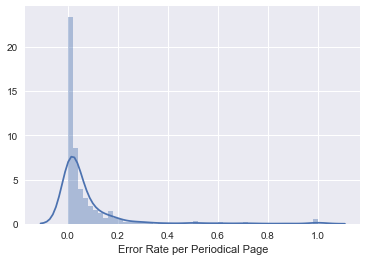

In [27]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [28]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 918),
 ('d', 700),
 ('m', 670),
 ('w', 667),
 ('e', 389),
 ('n', 291),
 ('r', 252),
 ('f', 244),
 ('g', 234),
 ('th', 177),
 ('t', 114),
 ('co', 99),
 ('k', 46),
 ('schwab', 30),
 ('u', 27),
 ('mt', 23),
 ('mattingly', 22),
 ('pa', 22),
 ('kuppenheimer', 20),
 ('editor-in-chief', 19),
 ("painters'", 19),
 ('va', 19),
 ('ph', 17),
 ('x', 15),
 ('kamoda', 14),
 ('z', 14),
 ('styleplus', 14),
 ('lippart', 14),
 ('dietel', 13),
 ('rebok', 13),
 ('herzog', 13),
 ('flather', 12),
 ('kimonas', 12),
 ('gonian', 11),
 ('friedlander', 11),
 ('ailes', 11),
 ('ahrens', 11),
 ('ei', 11),
 ('chesnutt', 11)]

## Review Remaining Errors

In [29]:
reports.docs_with_high_error_rate(summary)

[('Sligo19190401-V03-08-page36.txt', 1.0),
 ('Sligo19170501-V02-02-page33.txt', 1.0),
 ('Sligo19170501-V02-02-page9.txt', 1.0),
 ('Sligo19170501-V02-02-page11.txt', 1.0),
 ('Sligo19170501-V02-02-page29.txt', 1.0),
 ('Sligo19160501-VXX-XX-page51.txt', 1.0),
 ('Sligo19160501-VXX-XX-page56.txt', 1.0),
 ('Sligo19170501-V02-02-page51.txt', 1.0),
 ('Sligo19190301-V03-07-page27.txt', 1.0),
 ('Sligo19161101-V01-05-page33.txt', 1.0),
 ('Sligo19160501-VXX-XX-page16.txt', 0.889),
 ('Sligo19181101-V03-04-page3.txt', 0.871),
 ('Sligo19170501-V02-02-page6.txt', 0.8),
 ('Sligo19160501-VXX-XX-page14.txt', 0.75),
 ('Sligo19190301-V03-07-page1.txt', 0.714),
 ('Sligo19201101-V05-02-page1.txt', 0.714),
 ('Sligo19160501-VXX-XX-page66.txt', 0.706),
 ('Sligo19160501-VXX-XX-page76.txt', 0.692),
 ('Sligo19160501-VXX-XX-page25.txt', 0.643),
 ('Sligo19160501-VXX-XX-page30.txt', 0.615),
 ('Sligo19190301-V03-07-page51.txt', 0.6),
 ('Sligo19170501-V02-02-page18.txt', 0.6),
 ('Sligo19160501-VXX-XX-page34.txt', 0.591

In [30]:
# %load shared_elements/high_error_rates.py
doc_keys = [x[0] for x in reports.docs_with_high_error_rate(summary) if x[1] > 0.8]

utilities.open_original_docs(doc_keys, directories['cycle'])

Opened files: 

Sligo19190401-V03-08-page36.txt

Sligo19170501-V02-02-page33.txt

Sligo19170501-V02-02-page9.txt

Sligo19170501-V02-02-page11.txt

Sligo19170501-V02-02-page29.txt

Sligo19160501-VXX-XX-page51.txt

Sligo19160501-VXX-XX-page56.txt

Sligo19170501-V02-02-page51.txt

Sligo19190301-V03-07-page27.txt

Sligo19161101-V01-05-page33.txt

Sligo19160501-VXX-XX-page16.txt

Sligo19181101-V03-04-page3.txt



There are a number of blank pages in the periodical, where are being calculated as having a error rate of 1.

In [31]:
reports.long_errors(errors_summary, min_length=15)

(["rliaalezt'rottok",
  'accessible--get-at-able',
  'aiiiiiimmoinuiumummininiiiiiiiiiiiiimmiiiiiiiiiiiiimmiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiniiiiiiiiiiiiiiminimmilliniiiiiiiiiiiiiiiiiiiiiiiiiimmiiiiiimmtiiiiiiiiirri',
  'photographicffrints',
  'themauricejoyceengravingc',
  'emiminwimiimiiiiiiimmunimmou',
  'wearenowreadywithourfull',
  'self-satisfaction',
  'themavricejoyceengravingc',
  'wednesday-morning',
  "editor-in-chi'ef",
  'thirty-horse-power',
  'missionary-in-themaking',
  'character-foundation',
  "students'association",
  'tammininnthimminumniiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiimiiimminiiiiiiiiiiiiiiiiiiiiiiiimmuiiimiiiiiiiiliiimmiiiiiiiiiiiiiiiiiiiiiiiiimmiiiiiiiimiiiiiiiiiiiiimmiiiiiiiiiiiira',
  'ninumumimmimmummunimmummumummunommimminiumiimiumumummumimmimumumomminimminummumummulillimmuumnig',
  'commander-in-chief',
  'ccosagzegoatteeztemewssms',
  'miimiiiinimimmiiiimiiimiimmomm',
  'seminary-sanitarium',
  'storm-bewildered',
  'secretarytreasurer',
  'commandment

## Correction 7 -- Remove Long Errors with Repeating Characters

In [32]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = "correction6"
cycle = "correction7"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(clean.check_for_repeating_characters(tokens, "m|M"))
    replacements.append(clean.check_for_repeating_characters(tokens, "i|I"))
    
    if len(replacements) > 1:
        replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Sligo19160401-V01-01-page7.txt: [('aiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiimminninsiiiiiiiIiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiliiiiiiiiiiiiiiiiiiiiiiiIiiiiiiiiiiiiimiliiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiifi', ' ')]
Sligo19160901-V01-03,04-page7.txt: [('rilimiimmummininimummumummummommumummimiummummunnumnimmilmmoiimmimmmmunimmunimminimnummumumme', ' ')]
Sligo19161101-V01-05-page22.txt: [('MIIMIIIINIMIMMIIIIMIIIMIIMMOMM', ' '), ('EMIMINWIMIIMIIIIIIIMMUNIMMOU', ' '), ('MIIMIIIINIMIMMIIIIMIIIMIIMMOMM', ' '), ('NEEHEENEEMEIIEEMEEininiEniEnErniNEMEMElliiiiEiniiiiiliiiiiiniiniiEEMENEMEEEMHIEEMEMEMO', ' ')]
Sligo19161201-V01-06-page7.txt: [('Ninumumimmimmummunimmummumummunommimminiumiimiumumummumimmimumumomminimminummumummulillimmuumnig', ' '), ('tammininnthimminumniiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiimiiimminiiiiiiiiiiiiiiiiiiiiiiiimmuiiimiiiiiiiiliiimmiiiiiiiiiiiiiiiiiiiiiiiiimmiiiiiiiimiiiiiiiiiiiiimmiiiiiiiiiiiira', ' '), ('tamm

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/Sligo/correction7

Average verified rate: 0.9694850297753176

Average of error rates: 0.06949411764705882

Total token count: 290677



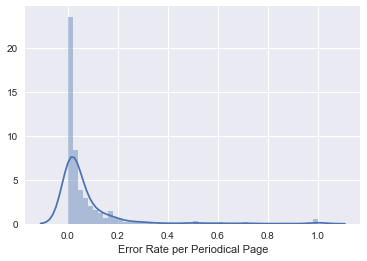

In [33]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [34]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 918),
 ('d', 700),
 ('m', 670),
 ('w', 667),
 ('e', 389),
 ('n', 291),
 ('r', 252),
 ('f', 244),
 ('g', 234),
 ('th', 177),
 ('t', 114),
 ('co', 99),
 ('k', 46),
 ('schwab', 30),
 ('u', 27),
 ('mt', 23),
 ('mattingly', 22),
 ('pa', 22),
 ('kuppenheimer', 20),
 ('editor-in-chief', 19),
 ("painters'", 19),
 ('va', 19),
 ('ph', 17),
 ('x', 15),
 ('kamoda', 14),
 ('z', 14),
 ('styleplus', 14),
 ('lippart', 14),
 ('dietel', 13),
 ('rebok', 13),
 ('herzog', 13),
 ('flather', 12),
 ('kimonas', 12),
 ('gonian', 11),
 ('friedlander', 11),
 ('ailes', 11),
 ('ahrens', 11),
 ('ei', 11),
 ('chesnutt', 11)]

## Correction 8 -- Split Squashed Words

In [35]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = "correction7"
cycle = "correction8"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = utilities.readfile(directories['prev'], filename)
    clean.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = utilities.strip_punct(content)
    tokens = utilities.tokenize_text(text)
    
    wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
    maxword = max(len(x) for x in sorted_list_of_words)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = clean.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if clean.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Sligo19160901-V01-03,04-page5.txt: [('LHIDTHESLIGONIANEl', 'L H I D T H E S L I G O N I A N E l')]
Sligo19181101-V03-04-page27.txt: [('WoodwardandLothrop', 'Woodward and Lothrop')]
Sligo19181201-V03-05-page34.txt: [('WoodwardandLothrop', 'Woodward and Lothrop')]
Sligo19190301-V03-07-page48.txt: [('WoodwardandLothrop', 'Woodward and Lothrop')]
Sligo19190401-V03-08-page3.txt: [('conscienceappealing', 'conscience appealing')]
Sligo19190401-V03-08-page34.txt: [('WoodwardandLothrop', 'Woodward and Lothrop')]
Sligo19191001-V04-01-page2.txt: [('WoodwardandLothrop', 'Woodward and Lothrop')]
Sligo19191001-V04-01-page33.txt: [('WEARENOWREADYWITHOURFULL', 'WE ARE NOW READY WITH OUR FULL')]
Sligo19201001-V05-01-page24.txt: [('secretarytreasurer', 'secretary treasurer')]
Sligo19201201-V05-03-page31.txt: [('THEMAURICEJOYCEENGRAVINGC', 'THE MAURICE JOYCE ENGRAVING C')]
Sligo19201201-V05-03-page36.txt: [('CompanySchenectady', 'Company Schenectady')]


Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/Sligo/correction8

Average verified rate: 0.9695029874413948

Average of error rates: 0.06944509803921568

Total token count: 290717



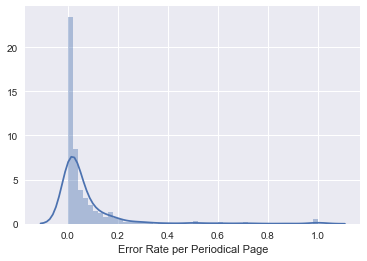

In [36]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [37]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 918),
 ('d', 701),
 ('m', 670),
 ('w', 667),
 ('e', 391),
 ('n', 293),
 ('r', 252),
 ('f', 244),
 ('g', 235),
 ('th', 177),
 ('t', 115),
 ('co', 99),
 ('k', 46),
 ('schwab', 30),
 ('u', 27),
 ('mt', 23),
 ('mattingly', 22),
 ('pa', 22),
 ('kuppenheimer', 20),
 ('editor-in-chief', 19),
 ("painters'", 19),
 ('va', 19),
 ('ph', 17),
 ('x', 15),
 ('kamoda', 14),
 ('z', 14),
 ('styleplus', 14),
 ('lippart', 14),
 ('dietel', 13),
 ('rebok', 13),
 ('herzog', 13),
 ('flather', 12),
 ('kimonas', 12),
 ('gonian', 11),
 ('friedlander', 11),
 ('ailes', 11),
 ('ahrens', 11),
 ('ei', 11),
 ('chesnutt', 11)]